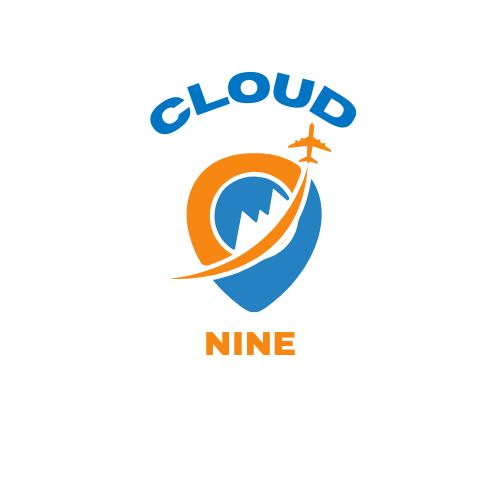

<!-- orange page break -->
<hr style="background-color:orange; height: 20px;" />


# <center style="color:blue">CLOUD-NINE-FLIGHT-SOLUTIONS</center>


## <span style="color:green">CodeUp LLC</span>
## <span style="color:blue">SOUTHWEST FINAL NOTEBOOK</span>
### <span style="color:orange">By: Alfred W. S. Pirovits Jr.</span>
### <span style="color:orange">Emanuel Villa</span>
### <span style="color:orange">Miatta Sinayoko</span>
### <span style="color:orange">Quintela Cohort: Data Science</span>
### <span style="color:orange">Source: https://www.kaggle.com/datasets/sherrytp/airline-delay-analysis

# <span style="color:blue">Executive Summary</span>


### <span style="color:orange">This project includes data pulled from https://www.kaggle.com/datasets/sherrytp/airline-delay-analysis covering 10 years of flights from 2009-2019. The data are held in 10 csv's (one for each year).Major airlines United Airlines,American Airlines, Delta and South West in addition to the top 15 Class B airpot hubs are obsrved. The project breaks down total delays for each flight and extracts an average delay over two week intervals from which a time series model is constructed to accurately characterize seasonal variation in the data with regard to delays.</span>

# <span style="color:blue">Project Goals:</span>


### <span style="color:orange">The goal is to develop a Machine Learning model that can accuratly decode a decade of flight data to predict and manage airline delays. By harnessing the power of seasonal trends and incorporating comprehensive flight data, we empower airlines to optimize operations,minimize costs, enhance passenger experience, and soar above the competition. Data-driven insights pave the way for stakeholders to make executive decisions based off of actionable analysis.</span>

# <span style="color:blue">Project Description:</span>


### <span style="color:orange">The purpose of this project is to look at all of the massive amounts of data and see if we can garner greneral trends that may prove useful to the mahor airline carrier stakeholders. We suspected that there is a yearly pattern that holds and dictates delays given the four seasons in a year but it would be nice to show that there is a repeatable trend. Additionally, we are wondering if these results will be different by major airlines as they often own different hubs in the transportation network. Different airports have diffenent airlines operating out of them as main hubs.</span>

# <span style="color:blue">Project Planning:</span>


### <span style="color:orange">The main goal of the project is to explore the data presented and see what we can discover. Since there is a verbouse aount of data ton observe we want to cut it down into a manageable set of features that I could use to characterize delays. We are relying on team member and Jr. Data Scientist Alfred W. S. Pirovits Jr. domain knowledge as a holder of a Commercial Pilot's License to choose initial features as appropriate. After doing this, we selected reputable airlines such as United Airlines,American Airlines, Delta and South West and focused on on Top 15 out of 37 Class B hubs.</span>

# <span style="color:blue">Intial Questions:</span>


### <span style="color:orange">Do flight delays exhibit a predictable seasonal pattern?
### <span style="color:orange">Is the seasonal variation in delays different for major airlines given their distinct hubs?</span>
### <span style="color:orange"> Is the total delay a viable aggregation of the individual delay types?</span>
### <span style="color:orange">Does the expected delay based on seasonal trends align with actual delay data?</span>

# <span style="color:blue">Data Dictionary</span>


<table>
    <thead>
        <tr>
            <th style="color: blue;">Attribute</th>
            <th style="color: blue;">Definition</th>
            <th style="color: blue;">Data Type</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td style="color: blue;">FL_DATE</td>
            <td style="color: orange;">The date of the flight in question</td>
            <td style="color: orange;">datetime64[ns]</td>
        </tr>
        <tr>
            <td style="color: blue;">OP_CARRIER</td>
            <td style="color: orange;">Two letter IATA carrier code for the airline in question</td>
            <td style="color: orange;">object</td>
        </tr>
        <tr>
            <td style="color: blue;">OP_CARRIER_FL_NUM</td>
            <td style="color: orange;">Flight number associated with the airline</td>
            <td style="color: orange;">int64</td>
        </tr>
        <tr>
            <td style="color: blue;">ORIGIN</td>
            <td style="color: orange;">Origin airport for the flight</td>
            <td style="color: orange;">object</td>
        </tr>
        <tr>
            <td style="color: blue;">DEST</td>
            <td style="color: orange;">Destination airport for the flight</td>
            <td style="color: orange;">object</td>
        </tr>
        <tr>
            <td style="color: blue;">CARRIER_DELAY</td>
            <td style="color: orange;">Delay caused by the carrier in minutes</td>
            <td style="color: orange;">float64</td>
        </tr>
        <tr>
            <td style="color: blue;">WEATHER_DELAY</td>
            <td style="color: orange;">Delay caused due to weather conditions in minutes</td>
            <td style="color: orange;">float64</td>
        </tr>
        <tr>
            <td style="color: blue;">NAS_DELAY</td>
            <td style="color: orange;">NAS (national airspace system) delay caused in minutes</td>
            <td style="color: orange;">float64</td>
        </tr>
        <tr>
            <td style="color: blue;">SECURITY_DELAY</td>
            <td style="color: orange;">Delay caused by security problems in minutes</td>
            <td style="color: orange;">float64</td>
        </tr>
        <tr>
            <td style="color: blue;">LATE_AIRCRAFT_DELAY</td>
            <td style="color: orange;">Delay caused by aircraft coming in late from a previous flight in minutes</td>
            <td style="color: orange;">float64</td>
        </tr>
        <tr>
            <td style="color: blue;">row_sums</td>
            <td style="color: orange;">(Assumed definition: Sum of certain row values)</td>
            <td style="color: orange;">float64</td>
        </tr>
        <tr>
            <td style="color: blue;">total_delay</td>
            <td style="color: orange;">The total of all the delay columns created during feature engineering in minutes</td>
            <td style="color: orange;">float64</td>
        </tr>
        <tr>
            <td style="color: blue;">average_delay</td>
            <td style="color: orange;">Average of the total delay column resampled by duration in minutes</td>
            <td style="color: orange;">float64</td>
        </tr>
    </tbody>
</table>



### <span style="color:blue">Target: </span> <span style="color:orange">Delays</span>


# <span style="color:blue">Imports </span>


In [1]:
# Importing the necessary libraries to run the code
import pandas as pd

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as image

# Statistical and mathematical tools
import scipy.stats as stats
from math import sqrt
import statsmodels.api as sm
from statsmodels.tsa.api import Holt, ExponentialSmoothing

# Custom modules
import wrangle as w
import explore as e
import model as m

# Configure warning behavior
import warnings
warnings.filterwarnings("ignore")


# <span style="color:blue">Acquire </span>


### <span style="color:orange">*Aquire data from https://www.kaggle.com/datasets/sherrytp/airline-delay-analysis</span>
### <span style="color:orange">* Data set consisted of 10 csv files</span>
### <span style="color:orange">* Octber 2009 and July 2011 are missing the entire months of data.</span>
###  <span style="color:orange">* Each observation represent an average delay for that day.</span>
### <span style="color:orange">* We are measuring the average delays for each day for the last ten years</span>

# <span style="color:blue">Data Type Summary </span>
### <span style="color:orange">* 1 integer</span>
###  <span style="color:orange">* 3 object</span>
### <span style="color:orange">* 6 float</span>
### <span style="color:orange">* 1 datetime value</span>

# <span style="color:blue">Prepare </span>


### <span style="color:orange">* Checked for nulls in the data (there were none)</span>
### <span style="color:orange">* Checked fi]or duplicates (there were none)</span>
### <span style="color:orange">* Filter flight data to only rows with delays.</span>
### <span style="color:orange">*Filter the data to to four airlines: Delta, American, Southwest, and United Airlines.</span>
### <span style="color:orange">*Filter the data to include only the top 15 Class B Airlines.</span>
### <span style="color:orange">*Split data into train, validate and test.</span>
### <span style="color:orange">*Outliers have not been removed for this iteration of the project.</span>

In [2]:
# used my wrangle function that acquires, preps and cleans the data
flights = w.pull_airline_data('WN')
df = w.clean_flight_data_for_average_daily_delay(flights)

# splits data train, validate, test
train, validate, test = m.train_test_split(df, 'd')
train_fl, validate_fl, test_fl = m.train_fl_test_fl_split(flights, '2W')

# <span style="color:blue">Data At a Glance</span>


In [3]:
# display the first 3 rows of the train flight dataframe to get an overview of its structure and data.

train_fl.head(3)

,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,row_sums
FL_DATE,,,,,,,,,,
2009-01-01,WN,82,DEN,AMA,1.0,0.0,0.0,0.0,105.0,106.0
2009-01-01,WN,1023,DEN,AUS,16.0,0.0,0.0,0.0,0.0,16.0
2009-01-01,WN,2494,DEN,AUS,34.0,0.0,0.0,0.0,0.0,34.0


In [4]:
train.head(3)

,average_delay
FL_DATE,
2009-01-01,38.719512
2009-01-02,54.142857
2009-01-03,34.230159


In [5]:
# display a snapshot of summary statistics
train.describe()


,average_delay
count,2922.000000
mean,46.517230
std,12.313389
min,21.137931
25%,38.056010
50%,43.876663
75%,52.468103
max,129.580000


# <span style="color:blue">Explore</span>

### <span style="color:orange">* Airports with high delays: invest in infrastructure mprovements to reduce delays</span>
### <span style="color:orange">* Monthly and fortnightly autocorrelation: delays persist.</span>
### <span style="color:orange">* The average of the average delays is 57.33 minutes.</span>

### <span style="color:orange">* Monthly delay differences: factors vary.</span>
### <span style="color:orange">* Passengers may need to be aware of the average delays at different airports when planning their travel.</span>
### <span style="color:orange">*There is a positive autocorrelation between the current month and the proceeding month, suggesting that factors causing delays in one month are also causing delays in the next month.</span>
### <span style="color:orange">*The autocorrelation between delays is not very strong, even at a lag of 1, suggesting that there are other factors that are also contributing to delays.</span>


### <span style="color:blue">Q1.Is the mean at each airport equal or is there something causing  a difference?</span>



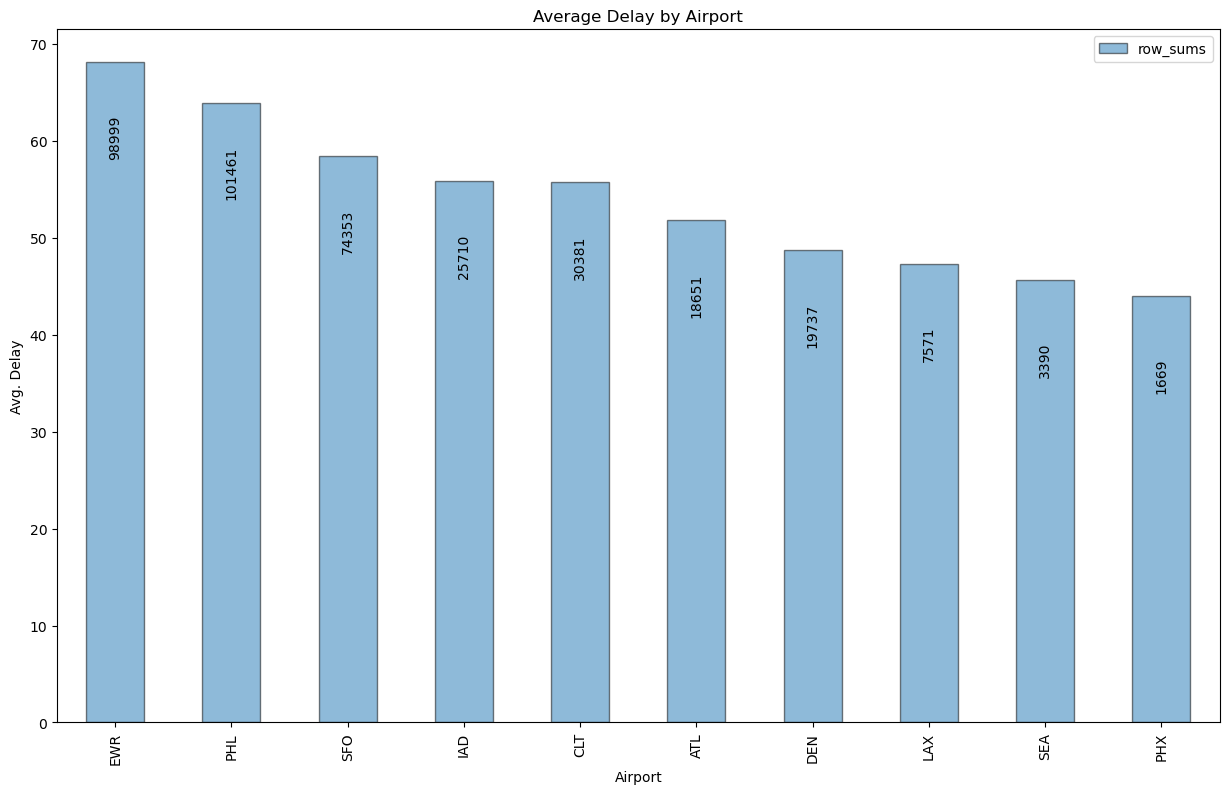

In [6]:
# calculate the average values for each airport using the flights data and train the model with the train_fl dataset.

m.means_by_airport(flights, train_fl)

### <span style="color:blue">Takeaways:</span>


<span style="color:orange">**The graph shows the average delay by airport. The average delay varies significantly by airport. Some airports, such as ATL and ORD, have much higher average delays than others, such as DEN and DFW.**</span>
<span style="color:orange">**This suggests that there are factors that are causing delays at some airports but not others. These factors could include airport infrastructure, weather conditions, or traffic congestion.**</span>


<span style="color:orange">* **Airports with higher average delays may need to invest in infrastructure improvements to reduce delays**</span>

<span style="color:orange">* **Airports with higher average delays may need to develop better strategies for managing weather conditions and traffic congestion.**</span>

<span style="color:orange">* **Airlines may need to adjust their schedules to avoid flying into airports with higher average delays.**</span>

<span style="color:orange">* **Passengers may need to be aware of the average delays at different airports when planning their travel.**</span>

<span style="color:orange">**Overall, the graph suggests that there are significant differences in the average delay by airport. This suggests that there are factors that are causing delays at some airports but not others. These factors could be addressed to reduce delays for passengers and airlines.**</span>

# <span style="color:blue">Statistical Testing</span>
## <span style="color:orange"> ANOVA  **F<sub>p</sub>**</span>

## <span style="color:blue">Hypothesis:</span>

### <span style="color:blue">**$H_{0}$:**</span><span style="color:orange"> The average delay in each airport are all the same.</span> 

### <span style="color:blue">**$H_{a}$:**</span><span style="color:orange"> The average delay in each airport are not all the same</span> 



In [7]:
# perform an ANOVA test to check if there are significant differences in means among the various airports in the flights dataset.
f, p = m.anova_airport_test(flights)
# 'f' is the F-statistic and 'p' is the p-value from the test.
f, p

KeyError: 'DFW_mean'

### <span style="color:orange"> We can reject the null hypothesis.
</span>

### <span style="color:blue"> Q2.Are current months correlated with the proceeding month?</span>

In [ ]:
# plot the lag plot for the 'train' dataset with a lag of 1 unit for the column 'm' to identify any autocorrelation.
m.plot_best_lag_plot(train, 'm', 1)

### <span style="color:blue">Takeaways:</span>

<span style="color:orange">**The graph shows that there is a positive autocorrelation between the current month and the proceeding month. This means that delays in the current month are correlated with delays in the proceeding month.**</span>
<span style="color:orange">**This suggests that there are factors that are causing delays in one month that are also causing delays in the next month. These factors could include weather conditions, airport infrastructure, or airline staffing.**</span>


<span style="color:orange">* **Airlines may need to adjust their schedules to account for autocorrelation in delays.**</span>

<span style="color:orange">* **Airports may need to develop strategies to mitigate the effects of autocorrelation on delays.**</span>

<span style="color:orange">* **Regulators may need to consider autocorrelation in delays when developing policies to reduce delays.**</span>

<span style="color:orange">* **Passengers may need to be aware of the average delays at different airports when planning their travel.**</span>

<span style="color:orange">**Overall, the finding of autocorrelation in delays suggests that there are factors that are causing delays to persist from one month to the next. This is an important finding that can be used to develop strategies to reduce delays.**</span>

# <span style="color:blue">Statistical Testing</span>
## <span style="color:orange"> Pearsons **R<sub>p</sub>**</span>

## <span style="color:blue">Hypothesis:</span>

### <span style="color:blue">**$H_{0}$:**</span><span style="color:orange"> There is no linear correlation between monthly delay and monthly lag dela.</span> 

### <span style="color:blue">**$H_{a}$:**</span><span style="color:orange"> There is a linear correlation between monthly delay and monthly lag delay.</span> 




In [ ]:
# set the significance level for statistical testing.
α = 0.05

# calculate the Pearson correlation coefficient (r) and its p-value between the 'm' column and another variable in the 'train' dataset.
corr, p = m.pearsons_r_test(train, 'm')
# 'corr' is the Pearson correlation coefficient and 'p' is the p-value for the test.
corr, p

## <span style="color:blue">P-value less than alpha?</span>


In [ ]:
# check if the observed p-value is less than the significance level (α). If true, the result is statistically significant.
p < α

### <span style="color:orange"> We can reject the null hypothesis.
</span>

### <span style="color:blue"> Q3. Is the mean of each month equal or is there something causing a difference?</span> 

In [ ]:
# plot the monthly delays using the train_fl dataset using the module m's function.
m.plot_month_delay(train_fl)

### <span style="color:blue">Takeaways:</span>

<span style="color:orange">**The graph shows that the average delay varies significantly by month. This suggests that there are factors that are causing delays in some months but not others. These factors could include weather conditions, holiday travel, or peak season travel.Summertime has the highest averages for the year, the aveage delay dips during the colder months**</span>


<span style="color:orange">* **Some months, such as December and January, have much higher average delays than others.December and January: These months are typically associated with cold weather and snow, which can lead to delays due to icy runways and poor visibility.Holiday travel: The Thanksgiving and Christmas holidays are typically associated with increased air travel, which can lead to delays due to congestion at airports and in the air. July and August accout for Peak season travel: The summer months are typically associated with peak season travel, which can lead to delays due to congestion at airports and in the air.**</span>

<span style="color:orange">* **Airlines and airports may need to take steps to mitigate the effects of seasonal delays. For example, airlines may need to adjust their schedules to avoid flying during peak travel times, and airports may need to implement strategies to manage traffic congestion during peak season.**</span>

<span style="color:orange">* **Regulators may also need to consider seasonal delays when developing policies to reduce delays. For example, regulators may need to require airlines to have more contingency plans in place during peak travel times.**</span>


<span style="color:orange">**Overall, the graph suggests that there are significant differences in the average delay by month. This suggests that there are factors that are causing delays in some months but not others. These factors could be addressed to reduce delays for passengers and airlines.**</span>

# <span style="color:blue">Statistical Testing</span>
## <span style="color:orange"> ANOVA  **F<sub>p</sub>**</span>

## <span style="color:blue">Hypothesis:</span>

### <span style="color:blue">**$H_{0}$:**</span><span style="color:orange"> The average delay in each airport are all the same.</span> 

### <span style="color:blue">**$H_{a}$:**</span><span style="color:orange"> The average delay in each airport are not all the same</span> 

In [ ]:
# getting theire data
f, p = m.anova_month_test(train)

f,p


### <span style="color:orange"> We can reject the null hypothesis.
</span>

### <span style="color:blue"> Q4.Are current fort nights correlated with the proceeding fort nights?</span> 

In [ ]:
# plot the best lag plot for the 'train' data with a frequency of '2 weeks' and a lag of 1.

m.plot_best_lag_plot(train, '2w', 1)

### <span style="color:blue">Takeaways:</span>

<span style="color:orange">**The graph shows there is a positive autocorrelation between the current fortnight and the proceeding fortnight. This means that delays in the current fortnight are correlated with delays in the proceeding fortnight.The autocorrelation is strongest at a lag of 1, which means that the correlation between current and proceeding fortnights is stronger than the correlation between current and previous fortnights or current and future fortnights.This suggests that there are factors that are causing delays in one fortnight that are also causing delays in the next fortnight. These factors could include weather conditions, airport infrastructure, or airline staffing.**</span>

<span style="color:orange">* **Airlines may need to adjust their schedules to account for autocorrelation in delays.**</span>

<span style="color:orange">* **Airports may need to develop strategies to mitigate the effects of autocorrelation on delays.**</span>


<span style="color:orange">* **Regulators may need to consider autocorrelation in delays when developing policies to reduce delays.**</span>

<span style="color:orange">**Overall, the finding of autocorrelation in delays suggests that there are factors that are causing delays to persist from one fortnight to the next. This is an important finding that can be used to develop strategies to reduce delays.Additionally, the graph shows that the autocorrelation is not very strong, even at a lag of 1. This suggests that there are other factors that are also contributing to delays, and that autocorrelation is not the only factor that needs to be considered when developing strategies to reduce delays**</span>

# <span style="color:blue">Statistical Testing</span>
## <span style="color:orange"> Pearsons **R<sub>p</sub>**</span>

## <span style="color:blue">Hypothesis:</span>

### <span style="color:blue">**$H_{0}$:**</span><span style="color:orange"> There is no linear correlation between monthly delay and monthly lag delay.</span> 

### <span style="color:blue">**$H_{a}$:**</span><span style="color:orange"> There is a linear correlation between monthly delay and monthly lag delay.</span> 

In [ ]:
# perform Pearson's correlation test using the 'train' dataset for the '2w' variable.
# 'corr' is the correlation coefficient and 'p' is the p-value indicating significance of the correlation.
corr, p = m.pearsons_r_test(train, '2w')

# display the correlation coefficient and p-value.
corr, p

In [ ]:
# using the 'wrangle' module, this line pulls airline data for the airline code 'WN' (Southwest Airlines) and stores it in the 'flights' variable.

flights = w.pull_airline_data('WN')

In [ ]:
flights

## <span style="color:orange">Clean dataset imputing 0 for nulls as they represent no delay and combining all delays into one column AND then averaging the delay by day</span>

In [ ]:
# clean the flight data using the 'clean_flight_data_for_average_daily_delay' function, then compute the average daily delay for each flight.
flights_daily_mean = w.clean_flight_data_for_average_daily_delay(flights)
# 'flights_daily_mean' contains the cleaned data with average daily delays for each flight.
flights_daily_mean

## <span style="color:orange">Plot average by varying time intervals</span>

In [ ]:
# plot the average values by interval using the daily mean data from the flights dataset.
e.plot_average_by_interval(flights_daily_mean)

In [ ]:
# plot the best lag plot for the daily mean values of the flights data to identify any autocorrelation.
e.plot_best_lag_plot(flights_daily_mean)

## <span style="color:orange">Split</span> 

In [ ]:
# split the dataset into training, validation, and testing sets using a bi-weekly ('2W') frequency split defined in module 'm'.

train, validate, test = m.train_test_split(flights_daily_mean, '2W')

In [ ]:
# view dataset
train

In [ ]:
# print the average delay value, rounded to two decimal places, from the 'train' dataset.
print(f'The average of the average delays is {train.mean()[0]:.2f} minutes')

## <span style="color:orange">Plot the split</span> 

In [ ]:
# visualize the data distribution across the training, validation, and test datasets using the graph_split function from module m.
m.graph_split(train, validate, test)

## <span style="color:orange">Seasonal Decomposition</span>  

In [ ]:
# decompose the 'train' time series data into its seasonal components and visualize it using a 2-week frequency.
e.seasonal_decomposition_plot(train, '2W')

## <span style="color:orange">Baselines</span>   

In [ ]:
# initializing a DataFrame 'eval_df' to store evaluation metrics for different models and target variables.
eval_df = pd.DataFrame(columns=['model_type', 'target_var', 'rmse'])
# initializing a DataFrame 'yhat_df' to store predicted average delay values.
yhat_df = pd.DataFrame(columns=['average_delay'])

## <span style="color:orange">Last Average</span>  

In [ ]:
# generate predictions using the "last average" baseline method on the training and validation datasets. 
# update the eval_df dataframe with the results and performance metrics.
eval_df = m.last_average_baseline(train, validate, yhat_df, eval_df)
# display the updated evaluation dataframe.
eval_df



## <span style="color:orange">Total Average</span>  

In [ ]:
# compute the total average baseline for the train and validate datasets, 
# then append the results to the yhat_df dataframe and store the updated data in eval_df.

eval_df = m.total_average_baseline(train, validate, yhat_df, eval_df)
# display the updated eval_df dataframe.
eval_df


## <span style="color:orange">Rolling Average</span>  

In [ ]:
# calculate the rolling average baselines for the train and validate datasets, then update and return the eval_df with the results.
eval_df = m.rolling_average_baselines(train, validate, yhat_df, eval_df)
# display the updated evaluation dataframe.
eval_df

### <span style="color:orange"> Baseline RMSE = 6.14 minutes</span>  

# <span style="color:blue">Models</span>   


### <span style="color:orange">* Three models were evaluated on the average delay target variable: Holt's Linear Trend, Holt's Seasonal Trend, and Previous Cycle.</span>
### <span style="color:orange">* Holt's Seasonal Trend with Dampening had the lowest RMSE on the validation set (5.01 minutes).</span>
### <span style="color:orange">* Monthly delay differences: factors vary.</span>
### <span style="color:orange">* There is no evidence of overfitting, as the RMSE on the test set (5.14 minutes) is only slightly higher than the RMSE on the validation set.</span>
### <span style="color:orange">* The final model is Holt's Seasonal Trend with Dampening, which is able to predict average delay with an RMSE of 5.14 minutes.</span>
### <span style="color:orange">* The model can be used to predict future average delays with a high degree of accuracy.</span>
### <span style="color:orange">* The model can be used by airlines, airports, and regulators to make informed decisions about how to reduce delays.</span>
### <span style="color:orange">* The Holt's Seasonal Trend with Dampening model is able to capture the seasonal patterns in average delay.</span>
### <span style="color:orange">* The model is also able to learn from the data and adjust its predictions over time.</span>
### <span style="color:orange">* The model is relatively simple to implement and interpret, making it a good choice for practitioners.</span>




In [ ]:
# initialize an evaluation dataframe with columns for model type, target variable, and RMSE (Root Mean Squared Error).
eval_df = pd.DataFrame(columns=['model_type', 'target_var', 'rmse'])
# initialize a dataframe to store predicted values, specifically average delays.
yhat_df = pd.DataFrame(columns=['average_delay'])

## <span style="color:orange">Holt's Linear Trend</span>   

In [ ]:
# use the Holt's Linear method to forecast the train dataset and validate its predictions. 
# the resulting evaluations are added to the 'eval_df' dataframe.
eval_df = m.holt_linear(train, validate, yhat_df, eval_df)
# display the evaluation dataframe 'eval_df'.
eval_df

average_delay -- RMSE: 6


## <span style="color:orange">Holt's Seasonal Trend</span>   

In [ ]:
# use the Holt's linear model to forecast average delay using training data, then evaluate its performance on the validation set.
# the results are appended to eval_df for further assessment.
eval_df = m.holts_average_delay(train, validate, yhat_df, eval_df)
# display the updated evaluation dataframe with forecast metrics.
eval_df

## <span style="color:orange">Previous Cycle</span>   

In [ ]:
# use the previous period's data from the train set to predict and evaluate the validate set. 
# update and return the evaluation metrics in eval_df.
eval_df = m.previous_period(train, validate, yhat_df, eval_df)
# display the updated evaluation dataframe.
eval_df

Best rmse: 5.01 minutes --- Delta: 1.13 minutes

### <span style="color:orange">There seems to be no overfitting here the best model is Holt's Seasonal with Dampening</span>   

## <span style="color:orange">Test</span>  

In [ ]:
# generate the final plot for 'average_delay' using training, validation, and test datasets, and update the yhat_df with the predictions.
yhat_df = m.final_plot('average_delay', train, validate, test, yhat_df)

In [ ]:
# compute the final RMSE (Root Mean Square Error) for the test data and return updated test and prediction dataframes.

test, yhat_df = m.final_rmse(test, yhat_df)

## <span style="color:orange">Forecast</span>  

In [ ]:
# generate a forecast plot for the 'average_delay' using the train, validate, and test datasets.
# additionally, retrieve the forecasted values in 'yhat_df'.
forecast = m.forecast_plot('average_delay', train, validate, test, yhat_df)
# display the first few rows of the forecasted data.
forecast.head()

## <span style="color:orange">Another look at trends and residuals</span>

In [ ]:
# decompose the 'average_delay' series in the 'train' dataset to observe its trend, seasonal, and residual components using the seasonal decomposition method. Then, plot the components.
sm.tsa.seasonal_decompose(train['average_delay']).plot()

# <span style="color:blue">Conclusion</span>  


### <span style="color:orange">* There is a clear seasonality to the delays</span>
### <span style="color:orange">* Our rmse jumped over baseline for all Airlines despite great performance on train and - validate</span>
### <span style="color:orange">* The seasonal trend IS useful and can inform expected delays given the time of the year</span>
### <span style="color:orange">* Even the best models couldn't predict COVID!!!</span>
### <span style="color:orange">* Covid started in 2019 and started to affect international flights in December. This may explain the result</span>
### <span style="color:orange">* Summer of 2011 had a massive delay spike for every ariline</span>
### <span style="color:orange">* 2013 showed the lowest point in the trendline</span>


# <span style="color:blue">Next steps</span>  

## <span style="color:orange">Carrier/Maintenance, NAS, Military/Airshow, Accident, Presidential, Natural Disaster all take a back seat to WEATHER!</span>
### <span style="color:orange">* Another look at trends and residuals</span>
### <span style="color:orange">* Upload historical METAR (hourly weather observations for pilots) data for all airports and append proper info based on departure and destination airports and append appropriately to the individual observations</span>
### <span style="color:orange">* Focus on winds, precipitation (amount and type), barometric pressure, visibility and cloud cover as features to predict residuals i.e. the day to day or week to week divergence from the seasonal trend in an ensemble model</span>
### <span style="color:orange">* Try out FB prophet and XG Boost as well as Neural Networks</span>
### <span style="color:orange">* Finish automating the best model selection</span>
### <span style="color:orange">* Anomoly Detection on Residuals</span>

